## FOSS Deep Learning Project

In [1]:
import numpy as np
import torch, torchvision
import matplotlib.pyplot as plt
from datetime import *
import autoencoder, classifier, preprocess
from autoencoder.CAE_model import *
import os

abs_dir = os.path.abspath('')

full_path = os.path.join(abs_dir, 'relative/path/to/file/you/want')
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('ran')

ran


##### Preproccesing

In [2]:
print('test')

test


##### Autoencoder

In [3]:
train_loader = 2
test_loader = 2
b_size = 4
num_epochs = 10
learning_rate = 1e-3

# dimension of the hidden layers
layer_channels = [8, 16, 32]
z_dim = 30

In [4]:
def conv2D_out_dim(chan, in_dim, kernel, stride, padding, mode = 'Normal'):

    if mode == 'Normal':
        out_dim = ((in_dim + 2 * padding - 1 * (kernel-1))/stride)+1
    #out_dimW = in_dimH if in_dimW is None else in_dimH
    else:
        out_dim = (in_dim - 1) * stride - 2 * padding + (kernel - 1) + 1
        
    return [f'{chan} X {out_dim} X {out_dim}']

print(conv2D_out_dim(chan = 3,
                     in_dim= 17,
                     kernel= 2,
                     stride= 2,
                     padding=1,
                     mode = 'Transpose'))

#prediction = SimpleVAE(data)
#print('Autoencoder are awesome')
data = [[[11,22],
         [33,44]],
        [[55,66],
         [77,88]],
        [[99,10],
         [11,12]]]




"""
TENSOR = torch.rand(128,9,9)
box = torch.tensor(data)
print(TENSOR, box.shape,4*"\n")
flad = torch.flatten(TENSOR)
print('New shape: \n',flad.shape)
"""




['3 X 32 X 32']


'\nTENSOR = torch.rand(128,9,9)\nbox = torch.tensor(data)\nprint(TENSOR, box.shape,4*"\n")\nflad = torch.flatten(TENSOR)\nprint(\'New shape: \n\',flad.shape)\n'

#### Simple ANN
###### Classifier taking Feature vectors from autoencoder as input

In [5]:
X = torch.ones([1, 8,200,89]).to(device)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
aemodel = CAE(z_dim=30).to(device)
aemodel.load_state_dict(torch.load('./autoencoder/model_dicts/CAE_10Kmodel.pth', map_location=device))
aemodel.eval()

ENCO = lambda img : aemodel.encode(img)
print(ENCO(X))

tensor([[-2.1208, -0.9813, -0.8465,  1.9548,  2.1905,  2.3003, -2.0297,  0.2910,
         -0.0086,  0.2439,  0.9227, -1.4990, -1.9170,  2.1368, -1.9473, -0.1724,
          0.7389, -0.4259, -1.7884, -0.9788,  1.9060,  0.6895,  1.9558, -0.6700,
          0.1882, -0.4031, -0.2615, -0.4290,  1.1994, -0.0938]],
       device='cuda:0', grad_fn=<AddmmBackward>)


Images loaded: [0/100]  ------  19:16:02
Done reading train/ images
Beginning permute
Finished permute
Dimension of X is :torch.Size([100, 8, 200, 89])
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
       

Avg train loss: 0.19688735842704774
			>>>>>>>>>>>>>>>>TEST RESULTS<<<<<<<<<<<<<<<<<
Avg. test loss 0.19160661220550537  | Accuray: 5.0

		------------------------------Epoch: 3------------------------------
Avg train loss: 0.1907899284362793
			>>>>>>>>>>>>>>>>TEST RESULTS<<<<<<<<<<<<<<<<<
Avg. test loss 0.19050767183303832  | Accuray: 17.0

		------------------------------Epoch: 4------------------------------
Avg train loss: 0.1848139715194702
			>>>>>>>>>>>>>>>>TEST RESULTS<<<<<<<<<<<<<<<<<
Avg. test loss 0.1895427656173706  | Accuray: 24.0

		------------------------------Epoch: 5------------------------------
Avg train loss: 0.17897512912750244
			>>>>>>>>>>>>>>>>TEST RESULTS<<<<<<<<<<<<<<<<<
Avg. test loss 0.18857446193695068  | Accuray: 24.0

		------------------------------Epoch: 6------------------------------
Avg train loss: 0.17313505649566652
			>>>>>>>>>>>>>>>>TEST RESULTS<<<<<<<<<<<<<<<<<
Avg. test loss 0.18765941262245178  | Accuray: 24.0

		----------------------------

Avg train loss: 0.011240926180034876
			>>>>>>>>>>>>>>>>TEST RESULTS<<<<<<<<<<<<<<<<<
Avg. test loss 0.1931622338294983  | Accuray: 24.0

		------------------------------Epoch: 43------------------------------
Avg train loss: 0.011169575615786015
			>>>>>>>>>>>>>>>>TEST RESULTS<<<<<<<<<<<<<<<<<
Avg. test loss 0.1931442904472351  | Accuray: 24.0

		------------------------------Epoch: 44------------------------------
Avg train loss: 0.011102929380722344
			>>>>>>>>>>>>>>>>TEST RESULTS<<<<<<<<<<<<<<<<<
Avg. test loss 0.19197015047073365  | Accuray: 24.0

		------------------------------Epoch: 45------------------------------
Avg train loss: 0.011008150530979038
			>>>>>>>>>>>>>>>>TEST RESULTS<<<<<<<<<<<<<<<<<
Avg. test loss 0.19141049385070802  | Accuray: 24.0

		------------------------------Epoch: 46------------------------------
Avg train loss: 0.010930471727624536
			>>>>>>>>>>>>>>>>TEST RESULTS<<<<<<<<<<<<<<<<<
Avg. test loss 0.1910658860206604  | Accuray: 24.0

		------------------

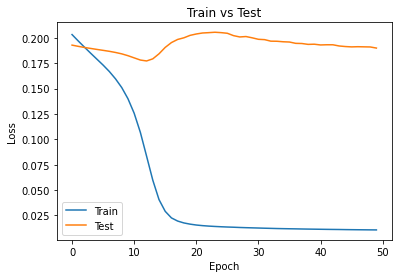

In [6]:
from classifier.MLP_Classifier import *
hidden_out = [8, 10, 10, 8]
ANN_10Kmodel = ANN(30, hidden_out)
ANN_10Kmodel = ANN_10Kmodel.to(device)
learningrate = 0.001  # Insert LR
epochs = 50  # Insert epochs

train_log = []
test_log = []

for epoch in range(epochs):
    print(f'\n\t\t------------------------------Epoch: {epoch + 1}------------------------------')
    tr_loss = train_model(traindataloader, ANN_10Kmodel, ENCO)
    train_log.append(tr_loss)
    
    print('\t\t\t>>>>>>>>>>>>>>>>TEST RESULTS<<<<<<<<<<<<<<<<<')
    te_loss = model_evaluate(testdataloader, ANN_10Kmodel, ENCO)
    test_log.append(te_loss)
    
torch.save(ANN_10Kmodel.state_dict(), 'classifier/model_dicts/ANN_10Kmodel.pth')

plt.plot(np.arange(len(train_log)), train_log, label='Train')  # etc.
plt.plot(np.arange(len(test_log)), test_log, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Train vs Test")
plt.legend()
plt.savefig(f"plots/classifier-plots/ANN_10K_Results-{str(datetime.now())[5:-10].replace(' ', '_').replace(':', '-')}.png")

